In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

#  Loading the datasets

In [629]:
df_fights = pd.read_csv('./dataset/ufc1.csv')
df_fighters = pd.read_csv('./dataset/ufc_fighters1.csv')

# Data Exploring and cleaning ufc fighters dataframe

In [630]:
df_fighters.head()

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
0,Tom Aaron,5-3-0,--,155 lbs.,--,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Danny Abbadi,4-6-0,"5' 11""",155 lbs.,--,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
2,Nariman Abbasov,28-4-0,"5' 8""",155 lbs.,"66""",Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0
3,Darion Abbey,9-5-0,"6' 2""",265 lbs.,"80""",Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0
4,David Abbott,10-15-0,"6' 0""",265 lbs.,--,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0


In [631]:
df_fighters.shape

(4449, 15)

In [632]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    4449 non-null   object 
 1   record  4449 non-null   object 
 2   height  4449 non-null   object 
 3   weight  4449 non-null   object 
 4   reach   4449 non-null   object 
 5   stance  3601 non-null   object 
 6   dob     4449 non-null   object 
 7   SLpM    4449 non-null   float64
 8   StrAcc  4449 non-null   object 
 9   SApM    4449 non-null   float64
 10  StrDef  4449 non-null   object 
 11  TDAvg   4449 non-null   float64
 12  TDAcc   4449 non-null   object 
 13  TDDef   4449 non-null   object 
 14  SubAvg  4449 non-null   float64
dtypes: float64(4), object(11)
memory usage: 521.5+ KB


In [633]:
df_fighters.head()

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
0,Tom Aaron,5-3-0,--,155 lbs.,--,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Danny Abbadi,4-6-0,"5' 11""",155 lbs.,--,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
2,Nariman Abbasov,28-4-0,"5' 8""",155 lbs.,"66""",Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0
3,Darion Abbey,9-5-0,"6' 2""",265 lbs.,"80""",Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0
4,David Abbott,10-15-0,"6' 0""",265 lbs.,--,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0


In [634]:
fighter_cols = df_fighters.columns.to_list()

In [635]:
fighter_cols

['name',
 'record',
 'height',
 'weight',
 'reach',
 'stance',
 'dob',
 'SLpM',
 'StrAcc',
 'SApM',
 'StrDef',
 'TDAvg',
 'TDAcc',
 'TDDef',
 'SubAvg']

# check for columns which are missing all important features

In [636]:
df_fighters.replace("--", np.nan, inplace=True)

In [637]:
indexes_to_drop = df_fighters.loc[(df_fighters["reach"].isna())&(df_fighters["weight"].isna())&(df_fighters["stance"].isna())&(df_fighters["height"].isna())&(df_fighters["SLpM"]==0)&(df_fighters["StrAcc"]=="0%")&(df_fighters["SApM"]==0)&(df_fighters["TDAvg"]==0)&(df_fighters["TDAcc"]=="0%")&(df_fighters["TDDef"]=="0%")&(df_fighters["SubAvg"]==0)&(df_fighters["StrDef"]=="0%")].index

In [638]:
len(indexes_to_drop)

65

In [639]:
df_fighters.drop(indexes_to_drop, inplace=True)

In [640]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4384 entries, 0 to 4448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    4384 non-null   object 
 1   record  4384 non-null   object 
 2   height  4129 non-null   object 
 3   weight  4363 non-null   object 
 4   reach   2507 non-null   object 
 5   stance  3601 non-null   object 
 6   dob     3935 non-null   object 
 7   SLpM    4384 non-null   float64
 8   StrAcc  4384 non-null   object 
 9   SApM    4384 non-null   float64
 10  StrDef  4384 non-null   object 
 11  TDAvg   4384 non-null   float64
 12  TDAcc   4384 non-null   object 
 13  TDDef   4384 non-null   object 
 14  SubAvg  4384 non-null   float64
dtypes: float64(4), object(11)
memory usage: 548.0+ KB


In [641]:
indexes_to_drop2 = df_fighters.loc[(df_fighters["SLpM"]==0)&(df_fighters["StrAcc"]=="0%")&(df_fighters["SApM"]==0)&(df_fighters["TDAvg"]==0)&(df_fighters["TDAcc"]=="0%")&(df_fighters["TDDef"]=="0%")&(df_fighters["SubAvg"]==0)&(df_fighters["StrDef"]=="0%")].index
len(indexes_to_drop2)

630

In [642]:
df_fighters.drop(indexes_to_drop2, inplace=True)

In [643]:
df_fighters.shape

(3754, 15)

In [644]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3754 entries, 1 to 4448
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3754 non-null   object 
 1   record  3754 non-null   object 
 2   height  3681 non-null   object 
 3   weight  3742 non-null   object 
 4   reach   2488 non-null   object 
 5   stance  3408 non-null   object 
 6   dob     3558 non-null   object 
 7   SLpM    3754 non-null   float64
 8   StrAcc  3754 non-null   object 
 9   SApM    3754 non-null   float64
 10  StrDef  3754 non-null   object 
 11  TDAvg   3754 non-null   float64
 12  TDAcc   3754 non-null   object 
 13  TDDef   3754 non-null   object 
 14  SubAvg  3754 non-null   float64
dtypes: float64(4), object(11)
memory usage: 469.2+ KB


In [645]:
print("Null Value and zero counts for fighter metrics")
for i in fighter_cols:
    mask = (
        (df_fighters[i] == "0%") |
        (df_fighters[i] == 0) |
        (df_fighters[i].isna())
    )

    count = mask.sum()
    
    if count > 0:
        print(f"{i}: {count}")


Null Value and zero counts for fighter metrics
height: 73
weight: 12
reach: 1266
stance: 346
dob: 196
SLpM: 106
StrAcc: 106
SApM: 31
StrDef: 39
TDAvg: 1168
TDAcc: 1168
TDDef: 862
SubAvg: 1820


In [646]:
df_fighters = df_fighters.reset_index(drop=True)

In [647]:
df_fighters.head(20)

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
0,Danny Abbadi,4-6-0,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
1,Nariman Abbasov,28-4-0,"5' 8""",155 lbs.,"66""",Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0
2,Darion Abbey,9-5-0,"6' 2""",265 lbs.,"80""",Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0
3,David Abbott,10-15-0,"6' 0""",265 lbs.,NaN,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0
4,Hamdy Abdelwahab,7-1-0 (1 NC),"6' 2""",265 lbs.,"72""",Southpaw,"Jan 22, 1993",4.27,55%,3.67,51%,3.25,65%,100%,0.0
5,Mansur Abdul-Malik,8-0-1,"6' 2""",185 lbs.,"80""",Orthodox,"Oct 07, 1997",4.27,48%,3.49,51%,0.49,33%,82%,0.0
6,Shamil Abdurakhimov,20-8-0,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.41,44%,3.02,55%,1.01,23%,45%,0.1
7,Hiroyuki Abe,8-15-3 (1 NC),"5' 6""",145 lbs.,NaN,Orthodox,"Feb 09, 1970",1.71,36%,3.11,63%,0.00,0%,33%,0.0
8,Daichi Abe,6-2-0,"5' 11""",170 lbs.,"71""",Orthodox,"Nov 27, 1991",3.80,33%,4.49,56%,0.33,50%,0%,0.0
9,Papy Abedi,10-4-0,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3


In [648]:
# check if there are fighters with the same name
df_fighters[df_fighters.duplicated(subset="name", keep=False)]

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
1166,Joey Gomez,6-2-0,"5' 10""",135 lbs.,"73""",Orthodox,"Jul 21, 1986",2.44,28%,4.46,55%,0.62,100%,50%,0.0
1168,Joey Gomez,7-1-0,"5' 10""",155 lbs.,"71""",Orthodox,"Aug 29, 1989",3.73,49%,3.33,50%,2.00,28%,0%,0.0
1551,Tony Johnson,7-2-0,"6' 2""",205 lbs.,"76""",Orthodox,"May 02, 1983",4.00,92%,3.67,22%,0.00,0%,90%,0.0
1559,Tony Johnson,11-3-0,"6' 1""",265 lbs.,NaN,NaN,NaN,2.00,53%,4.73,31%,2.00,22%,0%,0.0
2095,Michael McDonald,1-1-0,"5' 11""",205 lbs.,NaN,Orthodox,"Feb 06, 1965",0.00,0%,0.40,50%,0.00,0%,0%,0.0
2096,Michael McDonald,17-4-0,"5' 9""",135 lbs.,"70""",Orthodox,"Jan 15, 1991",2.69,42%,2.76,57%,1.09,66%,52%,1.4
3098,Jean Silva,19-12-3 (1 NC),"5' 6""",160 lbs.,NaN,Orthodox,"Oct 08, 1977",0.73,22%,2.93,52%,0.00,0%,0%,0.0
3112,Bruno Silva,15-7-2 (1 NC),"5' 4""",125 lbs.,"65""",Orthodox,"Mar 16, 1990",3.82,50%,4.55,52%,2.30,29%,63%,0.3
3113,Bruno Silva,23-13-0,"6' 0""",185 lbs.,"74""",Orthodox,"Jul 13, 1989",3.86,48%,5.35,41%,0.77,22%,74%,0.0
3123,Jean Silva,16-3-0,"5' 7""",145 lbs.,"69""",Orthodox,"Dec 27, 1996",4.79,51%,4.69,54%,0.50,50%,78%,0.8


In [649]:
df_fighters.iloc[1168,0] = 'Joey Gomez 155'
df_fighters.iloc[1559,0] = 'Tony Johnson 265'
df_fighters.iloc[2096,0] = 'Michael McDonald 135'
df_fighters.iloc[3123,0] = 'Jean Silva 145'
df_fighters.iloc[3113,0] = 'Bruno Silva 185'
df_fighters.iloc[3466,0] = 'Victor Valenzuela 170'

In [650]:
df_fighters[df_fighters['name']=='Joey Gomez 155']

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
1168,Joey Gomez 155,7-1-0,"5' 10""",155 lbs.,"71""",Orthodox,"Aug 29, 1989",3.73,49%,3.33,50%,2.0,28%,0%,0.0


In [651]:
# check if there are fighters with the same name
df_fighters[df_fighters.duplicated(subset="name", keep=False)]

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg


In [652]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3754 non-null   object 
 1   record  3754 non-null   object 
 2   height  3681 non-null   object 
 3   weight  3742 non-null   object 
 4   reach   2488 non-null   object 
 5   stance  3408 non-null   object 
 6   dob     3558 non-null   object 
 7   SLpM    3754 non-null   float64
 8   StrAcc  3754 non-null   object 
 9   SApM    3754 non-null   float64
 10  StrDef  3754 non-null   object 
 11  TDAvg   3754 non-null   float64
 12  TDAcc   3754 non-null   object 
 13  TDDef   3754 non-null   object 
 14  SubAvg  3754 non-null   float64
dtypes: float64(4), object(11)
memory usage: 440.1+ KB


In [653]:
def printNull(cls):
    
    print("Null Value and zero counts for fighter metrics")
    for i in cls:
        mask = (
            (df_fighters[i].isna()) 
            
        )
    
        count = mask.sum()
        
        if count > 0:
            print(f"{i}: {count}")

In [654]:
printNull(fighter_cols)

Null Value and zero counts for fighter metrics
height: 73
weight: 12
reach: 1266
stance: 346
dob: 196


In [655]:
df_fighters[df_fighters['height'].isna()]

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
42,Israel Albuquerque,0-3-0,NaN,185 lbs.,NaN,Orthodox,NaN,0.32,13%,3.34,25%,0.0,0%,0%,0.0
129,Angelo Antonio,1-4-0,NaN,205 lbs.,NaN,Orthodox,"Oct 04, 1998",1.09,50%,7.64,50%,0.0,0%,0%,0.0
316,Tom Blackledge,10-7-0,NaN,205 lbs.,NaN,Orthodox,NaN,2.91,61%,2.55,46%,0.0,0%,75%,0.0
382,Mack Brewer,0-1-0,NaN,205 lbs.,NaN,NaN,NaN,0.00,0%,6.67,36%,0.0,0%,0%,0.0
492,Remo Cardarelli,7-5-0,NaN,135 lbs.,NaN,NaN,NaN,2.27,47%,1.47,59%,0.0,0%,100%,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,Sam Watford,2-2-0,NaN,155 lbs.,NaN,NaN,NaN,0.13,18%,0.73,62%,2.0,40%,60%,1.0
3585,Blake Watkins,5-1-0,NaN,185 lbs.,NaN,NaN,NaN,5.45,62%,7.64,61%,0.0,0%,0%,0.0
3587,Maka Watson,4-2-0,NaN,155 lbs.,NaN,NaN,"Sep 22, 1984",0.93,37%,1.60,22%,2.0,100%,33%,0.0
3605,Aaron Wetherspoon,9-5-0 (1 NC),NaN,170 lbs.,NaN,NaN,"Jan 11, 1979",2.27,32%,4.33,45%,0.0,0%,77%,0.0


In [656]:
df_fighters.head()

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
0,Danny Abbadi,4-6-0,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
1,Nariman Abbasov,28-4-0,"5' 8""",155 lbs.,"66""",Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0
2,Darion Abbey,9-5-0,"6' 2""",265 lbs.,"80""",Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0
3,David Abbott,10-15-0,"6' 0""",265 lbs.,NaN,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0
4,Hamdy Abdelwahab,7-1-0 (1 NC),"6' 2""",265 lbs.,"72""",Southpaw,"Jan 22, 1993",4.27,55%,3.67,51%,3.25,65%,100%,0.0


In [657]:
#Reach to centimeters
df_fighters['reach'] = df_fighters['reach'].astype(str).str.replace('"', '')
df_fighters['reach'] = pd.to_numeric(df_fighters['reach'], errors='coerce')
df_fighters['reach'] = df_fighters['reach']*2.54

# fill reach ≈ height * 1.06
#df['height_in'] = df['height'].str.extract(r"(\d+)").astype(float) * 12 + df['height'].str.extract(r"' (\d+)").astype(float)
#df['reach'] = df['reach'].fillna(df['height_in'] * 1.06)


In [658]:
df_fighters.head()

,name,record,height,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg
0,Danny Abbadi,4-6-0,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
1,Nariman Abbasov,28-4-0,"5' 8""",155 lbs.,167.64,Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0
2,Darion Abbey,9-5-0,"6' 2""",265 lbs.,203.20,Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0
3,David Abbott,10-15-0,"6' 0""",265 lbs.,NaN,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0
4,Hamdy Abdelwahab,7-1-0 (1 NC),"6' 2""",265 lbs.,182.88,Southpaw,"Jan 22, 1993",4.27,55%,3.67,51%,3.25,65%,100%,0.0


In [659]:
def height_to_cm(h):
    if pd.isna(h): 
        return np.nan
    match = re.match(r"(\d+)' (\d+)", h)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        total_inches = feet * 12 + inches
        return total_inches * 2.54
    return np.nan

df_fighters['height_cm'] = df_fighters['height'].apply(height_to_cm)

In [660]:
df_fighters.drop(columns="height", inplace=True)

In [661]:
df_fighters.head()

,name,record,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm
0,Danny Abbadi,4-6-0,155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0,180.34
1,Nariman Abbasov,28-4-0,155 lbs.,167.64,Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0,172.72
2,Darion Abbey,9-5-0,265 lbs.,203.20,Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0,187.96
3,David Abbott,10-15-0,265 lbs.,NaN,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0,182.88
4,Hamdy Abdelwahab,7-1-0 (1 NC),265 lbs.,182.88,Southpaw,"Jan 22, 1993",4.27,55%,3.67,51%,3.25,65%,100%,0.0,187.96


In [662]:
#common ufc fighter height reach ratio
df_fighters['reach'] = df_fighters['reach'].fillna(df_fighters['height_cm'] * 1.06)

In [663]:
cols_updated = df_fighters.columns.to_list()
printNull(cols_updated)

Null Value and zero counts for fighter metrics
weight: 12
reach: 72
stance: 346
dob: 196
height_cm: 73


In [664]:
df_fighters.head()

,name,record,weight,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm
0,Danny Abbadi,4-6-0,155 lbs.,191.1604,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0,180.34
1,Nariman Abbasov,28-4-0,155 lbs.,167.6400,Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0,172.72
2,Darion Abbey,9-5-0,265 lbs.,203.2000,Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0,187.96
3,David Abbott,10-15-0,265 lbs.,193.8528,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0,182.88
4,Hamdy Abdelwahab,7-1-0 (1 NC),265 lbs.,182.8800,Southpaw,"Jan 22, 1993",4.27,55%,3.67,51%,3.25,65%,100%,0.0,187.96


In [665]:
df_fighters['stance'] = df_fighters['stance'].fillna("unknown")

In [666]:
printNull(cols_updated)

Null Value and zero counts for fighter metrics
weight: 12
reach: 72
dob: 196
height_cm: 73


In [667]:
df_fighters.drop(df_fighters[df_fighters["weight"].isna()].index, inplace=True)

In [668]:
printNull(cols_updated)

Null Value and zero counts for fighter metrics
reach: 61
dob: 190
height_cm: 62


In [669]:
df_fighters['height_cm'] = df_fighters['height_cm'].fillna(df_fighters['reach'] / 1.06)

In [670]:
printNull(cols_updated)

Null Value and zero counts for fighter metrics
reach: 61
dob: 190
height_cm: 61


In [671]:
df_fighters["weight"] = (
    df_fighters["weight"]
      .str.replace("lbs.", "", regex=False)
      .str.replace("lbs", "", regex=False)
      .str.strip()
      .astype(float)
)


In [672]:
df_fighters["weight_kg"] = df_fighters["weight"] * 0.453592

In [673]:
df_fighters.drop(columns="weight",inplace=True)

In [674]:
df_fighters.head()

,name,record,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm,weight_kg
0,Danny Abbadi,4-6-0,191.1604,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0,180.34,70.30676
1,Nariman Abbasov,28-4-0,167.6400,Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0,172.72,70.30676
2,Darion Abbey,9-5-0,203.2000,Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0,187.96,120.20188
3,David Abbott,10-15-0,193.8528,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0,182.88,120.20188
4,Hamdy Abdelwahab,7-1-0 (1 NC),182.8800,Southpaw,"Jan 22, 1993",4.27,55%,3.67,51%,3.25,65%,100%,0.0,187.96,120.20188


In [675]:
cols_updated1 = df_fighters.columns.to_list() 
printNull(cols_updated1)

Null Value and zero counts for fighter metrics
reach: 61
dob: 190
height_cm: 61


In [676]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 0 to 3753
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       3742 non-null   object 
 1   record     3742 non-null   object 
 2   reach      3681 non-null   float64
 3   stance     3742 non-null   object 
 4   dob        3552 non-null   object 
 5   SLpM       3742 non-null   float64
 6   StrAcc     3742 non-null   object 
 7   SApM       3742 non-null   float64
 8   StrDef     3742 non-null   object 
 9   TDAvg      3742 non-null   float64
 10  TDAcc      3742 non-null   object 
 11  TDDef      3742 non-null   object 
 12  SubAvg     3742 non-null   float64
 13  height_cm  3681 non-null   float64
 14  weight_kg  3742 non-null   float64
dtypes: float64(7), object(8)
memory usage: 467.8+ KB


In [677]:
df_fighters.drop(df_fighters[df_fighters['reach'].isna()].index,inplace=True)

In [678]:
printNull(cols_updated1)

Null Value and zero counts for fighter metrics
dob: 150


In [679]:
df_fighters.drop(df_fighters[df_fighters['dob'].isna()].index,inplace=True)

In [680]:
printNull(cols_updated1)

Null Value and zero counts for fighter metrics


In [681]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 3753
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       3531 non-null   object 
 1   record     3531 non-null   object 
 2   reach      3531 non-null   float64
 3   stance     3531 non-null   object 
 4   dob        3531 non-null   object 
 5   SLpM       3531 non-null   float64
 6   StrAcc     3531 non-null   object 
 7   SApM       3531 non-null   float64
 8   StrDef     3531 non-null   object 
 9   TDAvg      3531 non-null   float64
 10  TDAcc      3531 non-null   object 
 11  TDDef      3531 non-null   object 
 12  SubAvg     3531 non-null   float64
 13  height_cm  3531 non-null   float64
 14  weight_kg  3531 non-null   float64
dtypes: float64(7), object(8)
memory usage: 441.4+ KB


In [682]:
df_fighters.head()

,name,record,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm,weight_kg
0,Danny Abbadi,4-6-0,191.1604,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0,180.34,70.30676
1,Nariman Abbasov,28-4-0,167.6400,Orthodox,"Feb 01, 1994",3.00,20%,5.67,46%,0.00,0%,66%,0.0,172.72,70.30676
2,Darion Abbey,9-5-0,203.2000,Orthodox,"Feb 25, 1993",8.44,50%,14.06,28%,0.00,0%,0%,0.0,187.96,120.20188
3,David Abbott,10-15-0,193.8528,Switch,"Apr 26, 1965",1.35,30%,3.55,38%,1.07,33%,66%,0.0,182.88,120.20188
4,Hamdy Abdelwahab,7-1-0 (1 NC),182.8800,Southpaw,"Jan 22, 1993",4.27,55%,3.67,51%,3.25,65%,100%,0.0,187.96,120.20188


In [683]:
percent_cols = ["StrAcc","StrDef", "TDAcc", "TDDef"]

for col in percent_cols:
    df_fighters[col] = (
        df_fighters[col]
        .str.replace("%", "", regex=False)
        .str.replace("--", "", regex=False)
    )
    df_fighters[col] = pd.to_numeric(df_fighters[col], errors="coerce") / 100


In [684]:
df_fighters.head()

,name,record,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm,weight_kg
0,Danny Abbadi,4-6-0,191.1604,Orthodox,"Jul 03, 1983",3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,180.34,70.30676
1,Nariman Abbasov,28-4-0,167.6400,Orthodox,"Feb 01, 1994",3.00,0.20,5.67,0.46,0.00,0.00,0.66,0.0,172.72,70.30676
2,Darion Abbey,9-5-0,203.2000,Orthodox,"Feb 25, 1993",8.44,0.50,14.06,0.28,0.00,0.00,0.00,0.0,187.96,120.20188
3,David Abbott,10-15-0,193.8528,Switch,"Apr 26, 1965",1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0,182.88,120.20188
4,Hamdy Abdelwahab,7-1-0 (1 NC),182.8800,Southpaw,"Jan 22, 1993",4.27,0.55,3.67,0.51,3.25,0.65,1.00,0.0,187.96,120.20188


In [685]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 3753
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       3531 non-null   object 
 1   record     3531 non-null   object 
 2   reach      3531 non-null   float64
 3   stance     3531 non-null   object 
 4   dob        3531 non-null   object 
 5   SLpM       3531 non-null   float64
 6   StrAcc     3531 non-null   float64
 7   SApM       3531 non-null   float64
 8   StrDef     3531 non-null   float64
 9   TDAvg      3531 non-null   float64
 10  TDAcc      3531 non-null   float64
 11  TDDef      3531 non-null   float64
 12  SubAvg     3531 non-null   float64
 13  height_cm  3531 non-null   float64
 14  weight_kg  3531 non-null   float64
dtypes: float64(11), object(4)
memory usage: 441.4+ KB


In [686]:
# split wins losses and draws, NC s seperately
def split_record(record):
    if pd.isna(record):
        return pd.Series([None, None, None, None])

    # Extract: wins-losses-draws
    base = record.split("(")[0].strip()       # "7-1-0" or "4-6-0"
    wins, losses, draws = base.split("-")

    # Extract NC if present
    nc_match = re.search(r"\((\d+)\s*NC\)", record)
    nc = int(nc_match.group(1)) if nc_match else 0

    return pd.Series([int(wins), int(losses), int(draws), nc])


# ---- APPLY TO DATAFRAME ----
df_fighters[["wins", "losses", "draws", "nc"]] = df_fighters["record"].apply(split_record)


In [687]:
df_fighters.head()

,name,record,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm,weight_kg,wins,losses,draws,nc
0,Danny Abbadi,4-6-0,191.1604,Orthodox,"Jul 03, 1983",3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,180.34,70.30676,4,6,0,0
1,Nariman Abbasov,28-4-0,167.6400,Orthodox,"Feb 01, 1994",3.00,0.20,5.67,0.46,0.00,0.00,0.66,0.0,172.72,70.30676,28,4,0,0
2,Darion Abbey,9-5-0,203.2000,Orthodox,"Feb 25, 1993",8.44,0.50,14.06,0.28,0.00,0.00,0.00,0.0,187.96,120.20188,9,5,0,0
3,David Abbott,10-15-0,193.8528,Switch,"Apr 26, 1965",1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0,182.88,120.20188,10,15,0,0
4,Hamdy Abdelwahab,7-1-0 (1 NC),182.8800,Southpaw,"Jan 22, 1993",4.27,0.55,3.67,0.51,3.25,0.65,1.00,0.0,187.96,120.20188,7,1,0,1


In [688]:
df_fighters.drop(columns='record', inplace=True)

In [689]:
df_fighters.head()

,name,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm,weight_kg,wins,losses,draws,nc
0,Danny Abbadi,191.1604,Orthodox,"Jul 03, 1983",3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,180.34,70.30676,4,6,0,0
1,Nariman Abbasov,167.6400,Orthodox,"Feb 01, 1994",3.00,0.20,5.67,0.46,0.00,0.00,0.66,0.0,172.72,70.30676,28,4,0,0
2,Darion Abbey,203.2000,Orthodox,"Feb 25, 1993",8.44,0.50,14.06,0.28,0.00,0.00,0.00,0.0,187.96,120.20188,9,5,0,0
3,David Abbott,193.8528,Switch,"Apr 26, 1965",1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0,182.88,120.20188,10,15,0,0
4,Hamdy Abdelwahab,182.8800,Southpaw,"Jan 22, 1993",4.27,0.55,3.67,0.51,3.25,0.65,1.00,0.0,187.96,120.20188,7,1,0,1


In [690]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 3753
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       3531 non-null   object 
 1   reach      3531 non-null   float64
 2   stance     3531 non-null   object 
 3   dob        3531 non-null   object 
 4   SLpM       3531 non-null   float64
 5   StrAcc     3531 non-null   float64
 6   SApM       3531 non-null   float64
 7   StrDef     3531 non-null   float64
 8   TDAvg      3531 non-null   float64
 9   TDAcc      3531 non-null   float64
 10  TDDef      3531 non-null   float64
 11  SubAvg     3531 non-null   float64
 12  height_cm  3531 non-null   float64
 13  weight_kg  3531 non-null   float64
 14  wins       3531 non-null   int64  
 15  losses     3531 non-null   int64  
 16  draws      3531 non-null   int64  
 17  nc         3531 non-null   int64  
dtypes: float64(11), int64(4), object(3)
memory usage: 524.1+ KB


In [691]:
def dob_to_age(dob):
    if pd.isna(dob):
        return None
    try:
        birthdate = pd.to_datetime(dob)
        today = pd.Timestamp.today()
        age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
        return age
    except:
        return None

df_fighters["age"] = df_fighters["dob"].apply(dob_to_age)

In [692]:
df_fighters.head()

,name,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm,weight_kg,wins,losses,draws,nc,age
0,Danny Abbadi,191.1604,Orthodox,"Jul 03, 1983",3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,180.34,70.30676,4,6,0,0,42
1,Nariman Abbasov,167.6400,Orthodox,"Feb 01, 1994",3.00,0.20,5.67,0.46,0.00,0.00,0.66,0.0,172.72,70.30676,28,4,0,0,31
2,Darion Abbey,203.2000,Orthodox,"Feb 25, 1993",8.44,0.50,14.06,0.28,0.00,0.00,0.00,0.0,187.96,120.20188,9,5,0,0,32
3,David Abbott,193.8528,Switch,"Apr 26, 1965",1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0,182.88,120.20188,10,15,0,0,60
4,Hamdy Abdelwahab,182.8800,Southpaw,"Jan 22, 1993",4.27,0.55,3.67,0.51,3.25,0.65,1.00,0.0,187.96,120.20188,7,1,0,1,32


In [693]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 3753
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       3531 non-null   object 
 1   reach      3531 non-null   float64
 2   stance     3531 non-null   object 
 3   dob        3531 non-null   object 
 4   SLpM       3531 non-null   float64
 5   StrAcc     3531 non-null   float64
 6   SApM       3531 non-null   float64
 7   StrDef     3531 non-null   float64
 8   TDAvg      3531 non-null   float64
 9   TDAcc      3531 non-null   float64
 10  TDDef      3531 non-null   float64
 11  SubAvg     3531 non-null   float64
 12  height_cm  3531 non-null   float64
 13  weight_kg  3531 non-null   float64
 14  wins       3531 non-null   int64  
 15  losses     3531 non-null   int64  
 16  draws      3531 non-null   int64  
 17  nc         3531 non-null   int64  
 18  age        3531 non-null   int64  
dtypes: float64(11), int64(5), object(3)
memory usage: 551

In [694]:
df_fighters["total_fights"] = df_fighters["wins"] + df_fighters["losses"] + df_fighters["draws"]
df_fighters["win_rate"] = df_fighters["wins"] / df_fighters["total_fights"]


In [695]:
df_fighters.head()

,name,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,...,SubAvg,height_cm,weight_kg,wins,losses,draws,nc,age,total_fights,win_rate
0,Danny Abbadi,191.1604,Orthodox,"Jul 03, 1983",3.29,0.38,4.41,0.57,0.00,0.00,...,0.0,180.34,70.30676,4,6,0,0,42,10,0.400000
1,Nariman Abbasov,167.6400,Orthodox,"Feb 01, 1994",3.00,0.20,5.67,0.46,0.00,0.00,...,0.0,172.72,70.30676,28,4,0,0,31,32,0.875000
2,Darion Abbey,203.2000,Orthodox,"Feb 25, 1993",8.44,0.50,14.06,0.28,0.00,0.00,...,0.0,187.96,120.20188,9,5,0,0,32,14,0.642857
3,David Abbott,193.8528,Switch,"Apr 26, 1965",1.35,0.30,3.55,0.38,1.07,0.33,...,0.0,182.88,120.20188,10,15,0,0,60,25,0.400000
4,Hamdy Abdelwahab,182.8800,Southpaw,"Jan 22, 1993",4.27,0.55,3.67,0.51,3.25,0.65,...,0.0,187.96,120.20188,7,1,0,1,32,8,0.875000


In [696]:
df_fighters.loc[(df_fighters['win_rate']==1) & (df_fighters['total_fights']>10)]

,name,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,...,SubAvg,height_cm,weight_kg,wins,losses,draws,nc,age,total_fights,win_rate
62,Nurullo Aliev,182.8800,Orthodox,"Dec 08, 2000",2.72,0.44,1.63,0.58,2.12,0.43,...,0.3,177.80,70.30676,11,0,0,0,24,11,1.0
244,Farid Basharat,180.3400,Orthodox,"Aug 02, 1997",4.05,0.52,2.47,0.60,3.60,0.47,...,0.4,172.72,61.23492,14,0,0,0,28,14,1.0
560,Khamzat Chimaev,190.5000,Orthodox,"May 01, 1994",4.04,0.60,2.32,0.43,5.29,0.55,...,1.8,187.96,83.91452,15,0,0,0,31,15,1.0
936,Rafael Estevam,175.2600,Orthodox,"Aug 10, 1996",2.10,0.54,2.59,0.47,6.01,0.38,...,0.3,172.72,56.69900,14,0,0,0,29,14,1.0
948,Movsar Evloev,182.8800,Orthodox,"Feb 11, 1994",3.99,0.48,2.66,0.60,4.67,0.48,...,0.2,170.18,65.77084,19,0,0,0,31,19,1.0
1003,Torrez Finney,190.5000,Orthodox,"Oct 24, 1998",1.77,0.68,1.74,0.48,9.31,0.60,...,1.1,172.72,83.91452,11,0,0,0,27,11,1.0
1102,Tommy Gantt,193.0400,Orthodox,"Jan 09, 1993",1.08,1.00,0.36,0.66,10.78,0.40,...,5.4,180.34,70.30676,11,0,0,1,32,11,1.0
1539,Ramiro Jimenez,185.4200,Southpaw,"Jan 16, 1999",14.22,0.65,2.43,0.82,5.20,1.00,...,0.0,175.26,65.77084,11,0,0,0,26,11,1.0
1668,Aliaskhab Khizriev,187.9600,Southpaw,"Aug 24, 1990",6.01,0.64,4.38,0.61,5.64,0.60,...,3.8,175.26,83.91452,14,0,0,1,35,14,1.0
1877,Andre Lima,170.1800,Orthodox,"Feb 04, 1999",4.06,0.60,2.49,0.57,1.36,0.75,...,1.1,170.18,56.69900,11,0,0,0,26,11,1.0


In [697]:
df_fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3531 entries, 0 to 3753
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3531 non-null   object 
 1   reach         3531 non-null   float64
 2   stance        3531 non-null   object 
 3   dob           3531 non-null   object 
 4   SLpM          3531 non-null   float64
 5   StrAcc        3531 non-null   float64
 6   SApM          3531 non-null   float64
 7   StrDef        3531 non-null   float64
 8   TDAvg         3531 non-null   float64
 9   TDAcc         3531 non-null   float64
 10  TDDef         3531 non-null   float64
 11  SubAvg        3531 non-null   float64
 12  height_cm     3531 non-null   float64
 13  weight_kg     3531 non-null   float64
 14  wins          3531 non-null   int64  
 15  losses        3531 non-null   int64  
 16  draws         3531 non-null   int64  
 17  nc            3531 non-null   int64  
 18  age           3531 non-null   int

In [698]:
df_fighters["stance_encoded"] = df_fighters["stance"].astype("category").cat.codes

In [699]:
df_fighters.head()

,name,reach,stance,dob,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,...,height_cm,weight_kg,wins,losses,draws,nc,age,total_fights,win_rate,stance_encoded
0,Danny Abbadi,191.1604,Orthodox,"Jul 03, 1983",3.29,0.38,4.41,0.57,0.00,0.00,...,180.34,70.30676,4,6,0,0,42,10,0.400000,1
1,Nariman Abbasov,167.6400,Orthodox,"Feb 01, 1994",3.00,0.20,5.67,0.46,0.00,0.00,...,172.72,70.30676,28,4,0,0,31,32,0.875000,1
2,Darion Abbey,203.2000,Orthodox,"Feb 25, 1993",8.44,0.50,14.06,0.28,0.00,0.00,...,187.96,120.20188,9,5,0,0,32,14,0.642857,1
3,David Abbott,193.8528,Switch,"Apr 26, 1965",1.35,0.30,3.55,0.38,1.07,0.33,...,182.88,120.20188,10,15,0,0,60,25,0.400000,4
4,Hamdy Abdelwahab,182.8800,Southpaw,"Jan 22, 1993",4.27,0.55,3.67,0.51,3.25,0.65,...,187.96,120.20188,7,1,0,1,32,8,0.875000,3


In [700]:
df_fighters1 = df_fighters.drop(columns=['dob','stance'])

In [701]:
df_fighters1.head()

,name,reach,SLpM,StrAcc,SApM,StrDef,TDAvg,TDAcc,TDDef,SubAvg,height_cm,weight_kg,wins,losses,draws,nc,age,total_fights,win_rate,stance_encoded
0,Danny Abbadi,191.1604,3.29,0.38,4.41,0.57,0.00,0.00,0.77,0.0,180.34,70.30676,4,6,0,0,42,10,0.400000,1
1,Nariman Abbasov,167.6400,3.00,0.20,5.67,0.46,0.00,0.00,0.66,0.0,172.72,70.30676,28,4,0,0,31,32,0.875000,1
2,Darion Abbey,203.2000,8.44,0.50,14.06,0.28,0.00,0.00,0.00,0.0,187.96,120.20188,9,5,0,0,32,14,0.642857,1
3,David Abbott,193.8528,1.35,0.30,3.55,0.38,1.07,0.33,0.66,0.0,182.88,120.20188,10,15,0,0,60,25,0.400000,4
4,Hamdy Abdelwahab,182.8800,4.27,0.55,3.67,0.51,3.25,0.65,1.00,0.0,187.96,120.20188,7,1,0,1,32,8,0.875000,3


# UFC Fights dataframe pre processing

In [702]:
df_fights.head()

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,result,winner,weight_class,method,rounds,time,title_fight
0,Arman Tsarukyan,Dan Hooker,"November 22, 2025","Doha, Qatar",Marc Goddard,0,0,42,10,2,0,1,2,win,Arman Tsarukyan,Lightweight,SUB Arm Triangle,2,3:34,False
1,Ian Machado Garry,Belal Muhammad,"November 22, 2025","Doha, Qatar",Rich Mitchell,0,0,72,56,0,0,0,0,win,Ian Machado Garry,Welterweight,U-DEC,3,5:00,False
2,Volkan Oezdemir,Alonzo Menifield,"November 22, 2025","Doha, Qatar",Marc Goddard,1,0,13,2,0,0,0,0,win,Volkan Oezdemir,Light Heavyweight,KO/TKO Punches,1,1:27,False
3,Myktybek Orolbai,Jack Hermansson,"November 22, 2025","Doha, Qatar",Daniel Movahedi,1,0,15,19,0,0,0,0,win,Myktybek Orolbai,Welterweight,KO/TKO Punch,1,2:46,False
4,Waldo Cortes Acosta,Shamil Gaziev,"November 22, 2025","Doha, Qatar",Lukasz Bosacki,2,0,10,6,0,0,0,0,win,Waldo Cortes Acosta,Heavyweight,KO/TKO Punch,1,1:22,False


In [703]:
df_fights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fighter_1          8208 non-null   object
 1   fighter_2          8208 non-null   object
 2   date               8208 non-null   object
 3   location           8208 non-null   object
 4   referee            8183 non-null   object
 5   fighter_1_kd       8208 non-null   int64 
 6   fighter_2_kd       8208 non-null   int64 
 7   fighter_1_sig_str  8208 non-null   int64 
 8   fighter_2_sig_str  8208 non-null   int64 
 9   fighter_1_td       8208 non-null   int64 
 10  fighter_2_td       8208 non-null   int64 
 11  fighter_1_sub      8208 non-null   int64 
 12  fighter_2_sub      8208 non-null   int64 
 13  result             8208 non-null   object
 14  winner             8208 non-null   object
 15  weight_class       8208 non-null   object
 16  method             8208 non-null   object


In [704]:
df_fights.drop(df_fights[df_fights['referee'].isna()].index, inplace=True)

In [705]:
df_fights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8183 entries, 0 to 8207
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fighter_1          8183 non-null   object
 1   fighter_2          8183 non-null   object
 2   date               8183 non-null   object
 3   location           8183 non-null   object
 4   referee            8183 non-null   object
 5   fighter_1_kd       8183 non-null   int64 
 6   fighter_2_kd       8183 non-null   int64 
 7   fighter_1_sig_str  8183 non-null   int64 
 8   fighter_2_sig_str  8183 non-null   int64 
 9   fighter_1_td       8183 non-null   int64 
 10  fighter_2_td       8183 non-null   int64 
 11  fighter_1_sub      8183 non-null   int64 
 12  fighter_2_sub      8183 non-null   int64 
 13  result             8183 non-null   object
 14  winner             8183 non-null   object
 15  weight_class       8183 non-null   object
 16  method             8183 non-null   object
 17  

In [706]:
df_fights['date'] = pd.to_datetime(df_fights['date'])

In [707]:
df_fights['time'] = pd.to_datetime(df_fights['time'], format='%M:%S').dt.time

In [710]:
df_fights.head()

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,result,winner,weight_class,method,rounds,time,title_fight
0,Arman Tsarukyan,Dan Hooker,2025-11-22,"Doha, Qatar",Marc Goddard,0,0,42,10,2,0,1,2,win,Arman Tsarukyan,Lightweight,SUB Arm Triangle,2,00:03:34,False
1,Ian Machado Garry,Belal Muhammad,2025-11-22,"Doha, Qatar",Rich Mitchell,0,0,72,56,0,0,0,0,win,Ian Machado Garry,Welterweight,U-DEC,3,00:05:00,False
2,Volkan Oezdemir,Alonzo Menifield,2025-11-22,"Doha, Qatar",Marc Goddard,1,0,13,2,0,0,0,0,win,Volkan Oezdemir,Light Heavyweight,KO/TKO Punches,1,00:01:27,False
3,Myktybek Orolbai,Jack Hermansson,2025-11-22,"Doha, Qatar",Daniel Movahedi,1,0,15,19,0,0,0,0,win,Myktybek Orolbai,Welterweight,KO/TKO Punch,1,00:02:46,False
4,Waldo Cortes Acosta,Shamil Gaziev,2025-11-22,"Doha, Qatar",Lukasz Bosacki,2,0,10,6,0,0,0,0,win,Waldo Cortes Acosta,Heavyweight,KO/TKO Punch,1,00:01:22,False


In [714]:
df_fights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8183 entries, 0 to 8207
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fighter_1          8183 non-null   object        
 1   fighter_2          8183 non-null   object        
 2   date               8183 non-null   datetime64[ns]
 3   location           8183 non-null   object        
 4   referee            8183 non-null   object        
 5   fighter_1_kd       8183 non-null   int64         
 6   fighter_2_kd       8183 non-null   int64         
 7   fighter_1_sig_str  8183 non-null   int64         
 8   fighter_2_sig_str  8183 non-null   int64         
 9   fighter_1_td       8183 non-null   int64         
 10  fighter_2_td       8183 non-null   int64         
 11  fighter_1_sub      8183 non-null   int64         
 12  fighter_2_sub      8183 non-null   int64         
 13  result             8183 non-null   object        
 14  winner       

In [715]:
def print_unique_value(df):   
    for col in df:
        if df[col].dtype == "object":
            print(col, ": ",df[col].unique())

In [716]:
df_fights.result.unique()

array(['win', 'nc', 'draw\n\n\ndraw', 'nc\n\n\nnc'], dtype=object)

In [718]:
df_fights['result'] = (
    df_fights['result']
    .str.lower()
    .str.replace(r'\s+', '', regex=True)   # remove all whitespace/newlines
    .str.replace(r'(draw)+', 'draw', regex=True)
    .str.replace(r'(nc)+', 'nc', regex=True)
)


In [719]:
df_fights.result.unique()

array(['win', 'nc', 'draw'], dtype=object)

In [ ]:
print_unique_value(df_fights)

In [721]:
df_fights[df_fights['result']=='nc']

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,result,winner,weight_class,method,rounds,time,title_fight
53,Tom Aspinall,Ciryl Gane,2025-10-25,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Jason Herzog,0,0,27,30,0,0,0,0,nc,-,Heavyweight,CNC,1,00:04:35,True
127,Zach Reese,Sedriques Dumas,2025-09-13,"San Antonio, Texas, USA",Mike Beltran,0,0,2,3,0,0,0,0,nc,-,Middleweight,CNC,1,00:00:51,False
259,Paul Craig,Rodolfo Bellato,2025-06-14,"Atlanta, Georgia, USA",Kevin MacDonald,0,0,17,10,0,1,0,0,nc,-,Light Heavyweight,CNC,1,00:04:59,False
730,Abdul Razak Alhassan,Cody Brundage,2024-07-13,"Denver, Colorado, USA",Dan Miragliotta,0,0,23,1,0,0,0,0,nc,-,Middleweight,CNC,1,00:00:37,False
900,Bryan Battle,Ange Loosa,2024-03-16,"Las Vegas, Nevada, USA",Mike Beltran,0,0,27,23,1,0,0,0,nc,-,Welterweight,CNC,2,00:01:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7401,Karo Parisyan,Dong Hyun Kim,2009-01-31,"Las Vegas, Nevada, USA",Josh Rosenthal,0,0,24,19,2,2,1,2,nc,Dong Hyun Kim,Welterweight,Overturned,3,00:05:00,False
7707,Gray Maynard,Rob Emerson,2007-06-23,"Las Vegas, Nevada, USA",Steve Mazzagatti,0,0,20,3,2,1,1,1,nc,-,Lightweight,CNC,2,00:00:39,False
7970,Alessio Sakara,Ron Faircloth,2005-10-07,"Uncasville, Connecticut, USA",Herb Dean,1,0,46,2,0,0,0,0,nc,-,Light Heavyweight,CNC,2,00:00:10,False
8143,Benji Radach,Steve Berger,2002-05-10,"Bossier City, Louisiana, USA",John McCarthy,1,0,10,0,0,0,0,0,nc,Steve Berger,Welterweight,Overturned,1,00:00:27,False


In [725]:
df_fights.shape[0] == df_fights[df_fights['result']=='nc'].shape[0] + df_fights[df_fights['result']!='nc'].shape[0]

True

In [723]:
df_fights[df_fights['method']=="Overturned"]

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,result,winner,weight_class,method,rounds,time,title_fight
257,Mansur Abdul-Malik,Cody Brundage,2025-06-14,"Atlanta, Georgia, USA",Brent McKeehan,0,0,25,30,0,0,0,0,draw,Cody Brundage,Middleweight,Overturned,3,00:00:36,False
1058,Trey Ogden,Nikolas Motta,2023-11-18,"Las Vegas, Nevada, USA",Mike Beltran,0,0,58,14,3,0,1,0,nc,Nikolas Motta,Lightweight,Overturned,3,00:03:11,False
1122,Dan Argueta,Miles Johns,2023-09-23,"Las Vegas, Nevada, USA",Kerry Hatley,0,0,33,43,2,2,2,0,nc,Miles Johns,Bantamweight,Overturned,3,00:05:00,False
1135,Edgar Chairez,Daniel Lacerda,2023-09-16,"Las Vegas, Nevada, USA",Chris Tognoni,0,0,12,4,0,1,1,0,nc,Daniel Lacerda,Flyweight,Overturned,1,00:03:47,False
1299,Dan Argueta,Ronnie Lawrence,2023-06-17,"Las Vegas, Nevada, USA",Keith Peterson,0,0,4,1,1,0,2,0,nc,Ronnie Lawrence,Bantamweight,Overturned,1,00:02:20,False
1731,Don'Tale Mayes,Hamdy Abdelwahab,2022-07-30,"Dallas, Texas, USA",Kerry Hatley,0,1,47,58,0,3,0,0,nc,Hamdy Abdelwahab,Heavyweight,Overturned,3,00:05:00,False
2166,Kevin Holland,Kyle Daukaus,2021-10-02,"Las Vegas, Nevada, USA",Dan Miragliotta,0,0,3,9,0,1,0,3,nc,Kyle Daukaus,Middleweight,Overturned,1,00:03:43,False
2359,Matt Schnell,Rogerio Bontorin,2021-05-15,"Houston, Texas, USA",Kerry Hatley,0,0,65,72,0,1,0,0,nc,Rogerio Bontorin,Bantamweight,Overturned,3,00:05:00,False
2692,Donald Cerrone,Niko Price,2020-09-19,"Las Vegas, Nevada, USA",Jason Herzog,0,0,113,150,0,0,0,0,nc,Niko Price,Welterweight,Overturned,3,00:05:00,False
3095,Greg Hardy,Ben Sosoli,2019-10-18,"Boston, Massachusetts, USA",Bryan Miner,0,0,54,26,0,0,0,0,nc,Ben Sosoli,Heavyweight,Overturned,3,00:05:00,False


In [727]:
#  removing overturned and nc fights
df_fights = df_fights[df_fights['result']!='nc']

In [729]:
df_fights = df_fights[df_fights['method']!="Overturned"]

In [733]:
df_fights[df_fights['winner']=="-"].shape[0]

0

In [734]:
df_fights[df_fights['method']=="CNC"].shape[0]

0

In [735]:
df_fights.shape

(8094, 20)

In [736]:
df_fights.head()

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,result,winner,weight_class,method,rounds,time,title_fight
0,Arman Tsarukyan,Dan Hooker,2025-11-22,"Doha, Qatar",Marc Goddard,0,0,42,10,2,0,1,2,win,Arman Tsarukyan,Lightweight,SUB Arm Triangle,2,00:03:34,False
1,Ian Machado Garry,Belal Muhammad,2025-11-22,"Doha, Qatar",Rich Mitchell,0,0,72,56,0,0,0,0,win,Ian Machado Garry,Welterweight,U-DEC,3,00:05:00,False
2,Volkan Oezdemir,Alonzo Menifield,2025-11-22,"Doha, Qatar",Marc Goddard,1,0,13,2,0,0,0,0,win,Volkan Oezdemir,Light Heavyweight,KO/TKO Punches,1,00:01:27,False
3,Myktybek Orolbai,Jack Hermansson,2025-11-22,"Doha, Qatar",Daniel Movahedi,1,0,15,19,0,0,0,0,win,Myktybek Orolbai,Welterweight,KO/TKO Punch,1,00:02:46,False
4,Waldo Cortes Acosta,Shamil Gaziev,2025-11-22,"Doha, Qatar",Lukasz Bosacki,2,0,10,6,0,0,0,0,win,Waldo Cortes Acosta,Heavyweight,KO/TKO Punch,1,00:01:22,False


In [776]:
df_fights[df_fights['fighter_1']==df_fights['winner']].shape

(8040, 20)

In [777]:
df_fights.shape

(8094, 20)

In [779]:
df_fights.loc[(df_fights['fighter_1']==df_fights['winner'])].shape[0] ==  df_fights[df_fights['result']=='win'].shape[0]

True

In [780]:
df_fights.result.unique()

array(['win', 'draw'], dtype=object)

In [783]:
df_fights[df_fights['result']=='draw'].shape[0]

54

In [784]:
df_fights.drop(df_fights[df_fights['result']=='draw'].index, inplace=True)

In [785]:
df_fights[df_fights['result']=='draw'].shape[0]

0

In [787]:
df_fights.result.unique()

array(['win'], dtype=object)

In [788]:
df_fights.shape[0] == df_fights[df_fights['result']=='win'].shape[0]

True

In [789]:
df_fights.shape[0] == df_fights.loc[(df_fights['fighter_1']==df_fights['winner'])].shape[0]

True

In [786]:
df_fights.to_csv("./dataset/cleaned/ufc_fights_cleaned.csv", index=False)

In [790]:
df_fights.head()

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,result,winner,weight_class,method,rounds,time,title_fight
0,Arman Tsarukyan,Dan Hooker,2025-11-22,"Doha, Qatar",Marc Goddard,0,0,42,10,2,0,1,2,win,Arman Tsarukyan,Lightweight,SUB Arm Triangle,2,00:03:34,False
1,Ian Machado Garry,Belal Muhammad,2025-11-22,"Doha, Qatar",Rich Mitchell,0,0,72,56,0,0,0,0,win,Ian Machado Garry,Welterweight,U-DEC,3,00:05:00,False
2,Volkan Oezdemir,Alonzo Menifield,2025-11-22,"Doha, Qatar",Marc Goddard,1,0,13,2,0,0,0,0,win,Volkan Oezdemir,Light Heavyweight,KO/TKO Punches,1,00:01:27,False
3,Myktybek Orolbai,Jack Hermansson,2025-11-22,"Doha, Qatar",Daniel Movahedi,1,0,15,19,0,0,0,0,win,Myktybek Orolbai,Welterweight,KO/TKO Punch,1,00:02:46,False
4,Waldo Cortes Acosta,Shamil Gaziev,2025-11-22,"Doha, Qatar",Lukasz Bosacki,2,0,10,6,0,0,0,0,win,Waldo Cortes Acosta,Heavyweight,KO/TKO Punch,1,00:01:22,False


In [791]:
def create_balanced_fight_data(df_original: pd.DataFrame) -> pd.DataFrame:
    """
    Balances a fight-by-fight dataset by creating a symmetric row for every fight.
    This corrects for positional bias (e.g., fighter_1 always being the winner) and
    ensures a 50/50 target distribution for modeling.
    """
    df = df_original.copy()

    # ----------------------------------------------------------------------
    # 1. Create the Target Variable
    # ----------------------------------------------------------------------
    # Target = 1 if fighter_1 is the winner (fighter in the f1 slot wins), 0 otherwise.
    df['target'] = (df['fighter_1'] == df['winner']).astype(int)

    # ----------------------------------------------------------------------
    # 2. Define Columns to Swap
    # ----------------------------------------------------------------------
    # Pairs of columns that belong to fighter_1 and fighter_2, including names and stats
    SWAP_PAIRS = [
        ('fighter_1', 'fighter_2'),
        ('fighter_1_kd', 'fighter_2_kd'),
        ('fighter_1_sig_str', 'fighter_2_sig_str'),
        ('fighter_1_td', 'fighter_2_td'),
        ('fighter_1_sub', 'fighter_2_sub')
    ]

    # ----------------------------------------------------------------------
    # 3. Create the Flipped Data Frame
    # ----------------------------------------------------------------------
    df_flipped = df.copy()

    # A) Swap F1 and F2 columns
    for col_f1, col_f2 in SWAP_PAIRS:
        temp = df_flipped[col_f1].copy()
        df_flipped[col_f1] = df_flipped[col_f2]
        df_flipped[col_f2] = temp

    # B) Invert the Target Variable (1 becomes 0, 0 becomes 1)
    df_flipped['target'] = 1 - df_flipped['target']

    # ----------------------------------------------------------------------
    # 4. Concatenate and Finalize
    # ----------------------------------------------------------------------
    # Combine the original and the flipped dataframes
    df_final_ml = pd.concat([df, df_flipped], ignore_index=True)

    # Drop the original outcome columns that are now redundant or replaced by 'target'
    df_final_ml = df_final_ml.drop(columns=['winner', 'result'])
    
    return df_final_ml

In [792]:
df_fights_final = create_balanced_fight_data(df_fights)

In [794]:
df_fights_final.shape

(16080, 19)

In [798]:
df_fights.shape

(8040, 20)

In [797]:
df_fights_final.head()

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,weight_class,method,rounds,time,title_fight,target
0,Arman Tsarukyan,Dan Hooker,2025-11-22,"Doha, Qatar",Marc Goddard,0,0,42,10,2,0,1,2,Lightweight,SUB Arm Triangle,2,00:03:34,False,1
1,Ian Machado Garry,Belal Muhammad,2025-11-22,"Doha, Qatar",Rich Mitchell,0,0,72,56,0,0,0,0,Welterweight,U-DEC,3,00:05:00,False,1
2,Volkan Oezdemir,Alonzo Menifield,2025-11-22,"Doha, Qatar",Marc Goddard,1,0,13,2,0,0,0,0,Light Heavyweight,KO/TKO Punches,1,00:01:27,False,1
3,Myktybek Orolbai,Jack Hermansson,2025-11-22,"Doha, Qatar",Daniel Movahedi,1,0,15,19,0,0,0,0,Welterweight,KO/TKO Punch,1,00:02:46,False,1
4,Waldo Cortes Acosta,Shamil Gaziev,2025-11-22,"Doha, Qatar",Lukasz Bosacki,2,0,10,6,0,0,0,0,Heavyweight,KO/TKO Punch,1,00:01:22,False,1


# Merge the fighter and fight stat dataframes

In [805]:
df_f1 = df_fights_final.merge(
    df_fighters1,
    left_on="fighter_1",
    right_on="name",
    how="left",
    suffixes=("", "_f1")
)

df_final = df_f1.merge(
    df_fighters1,
    left_on="fighter_2",
    right_on="name",
    how="left",
    suffixes=("_f1", "_f2")
)


In [806]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16080 entries, 0 to 16079
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fighter_1          16080 non-null  object        
 1   fighter_2          16080 non-null  object        
 2   date               16080 non-null  datetime64[ns]
 3   location           16080 non-null  object        
 4   referee            16080 non-null  object        
 5   fighter_1_kd       16080 non-null  int64         
 6   fighter_2_kd       16080 non-null  int64         
 7   fighter_1_sig_str  16080 non-null  int64         
 8   fighter_2_sig_str  16080 non-null  int64         
 9   fighter_1_td       16080 non-null  int64         
 10  fighter_2_td       16080 non-null  int64         
 11  fighter_1_sub      16080 non-null  int64         
 12  fighter_2_sub      16080 non-null  int64         
 13  weight_class       16080 non-null  object        
 14  method

In [807]:
df_final1= df_final.dropna()

In [808]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16026 entries, 0 to 16079
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fighter_1          16026 non-null  object        
 1   fighter_2          16026 non-null  object        
 2   date               16026 non-null  datetime64[ns]
 3   location           16026 non-null  object        
 4   referee            16026 non-null  object        
 5   fighter_1_kd       16026 non-null  int64         
 6   fighter_2_kd       16026 non-null  int64         
 7   fighter_1_sig_str  16026 non-null  int64         
 8   fighter_2_sig_str  16026 non-null  int64         
 9   fighter_1_td       16026 non-null  int64         
 10  fighter_2_td       16026 non-null  int64         
 11  fighter_1_sub      16026 non-null  int64         
 12  fighter_2_sub      16026 non-null  int64         
 13  weight_class       16026 non-null  object        
 14  method     

# Create delta features

In [811]:
df_final1["delta_height"] = df_final1["height_cm_f1"] - df_final1["height_cm_f2"]
df_final1["delta_reach"]  = df_final1["reach_f1"]  - df_final1["reach_f2"]
df_final1["delta_age"]    = df_final1["age_f1"]       - df_final1["age_f2"]
df_final1["delta_win_rate"]    = df_final1["win_rate_f1"]       - df_final1["win_rate_f2"]
df_final1["delta_SLpM"]   = df_final1["SLpM_f1"]      - df_final1["SLpM_f2"]
df_final1["delta_StrAcc"]   = df_final1["StrAcc_f1"]      - df_final1["StrAcc_f2"]
df_final1["delta_SApM"]   = df_final1["SApM_f1"]      - df_final1["SApM_f2"]
df_final1["delta_StrDef"]  = df_final1["StrDef_f1"]     - df_final1["StrDef_f2"]
df_final1["delta_TDAvg"]  = df_final1["TDAvg_f1"]     - df_final1["TDAvg_f2"]
df_final1["delta_TDAcc"]  = df_final1["TDAcc_f1"]     - df_final1["TDAcc_f2"]
df_final1["delta_TDDef"]  = df_final1["TDDef_f1"]     - df_final1["TDDef_f2"]
df_final1["delta_SubAvg"]  = df_final1["SubAvg_f1"]     - df_final1["SubAvg_f2"]

C:\Users\CHAMA COMPUTERS\AppData\Local\Temp\ipykernel_41040\260616534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final1["delta_height"] = df_final1["height_cm_f1"] - df_final1["height_cm_f2"]
C:\Users\CHAMA COMPUTERS\AppData\Local\Temp\ipykernel_41040\260616534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final1["delta_reach"]  = df_final1["reach_f1"]  - df_final1["reach_f2"]
C:\Users\CHAMA COMPUTERS\AppData\Local\Temp\ipykernel_41040\260616534.py:3: SettingWithCopyWarning: 
A value is

In [812]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16026 entries, 0 to 16079
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fighter_1          16026 non-null  object        
 1   fighter_2          16026 non-null  object        
 2   date               16026 non-null  datetime64[ns]
 3   location           16026 non-null  object        
 4   referee            16026 non-null  object        
 5   fighter_1_kd       16026 non-null  int64         
 6   fighter_2_kd       16026 non-null  int64         
 7   fighter_1_sig_str  16026 non-null  int64         
 8   fighter_2_sig_str  16026 non-null  int64         
 9   fighter_1_td       16026 non-null  int64         
 10  fighter_2_td       16026 non-null  int64         
 11  fighter_1_sub      16026 non-null  int64         
 12  fighter_2_sub      16026 non-null  int64         
 13  weight_class       16026 non-null  object        
 14  method     

In [813]:
df_final1.head()

,fighter_1,fighter_2,date,location,referee,fighter_1_kd,fighter_2_kd,fighter_1_sig_str,fighter_2_sig_str,fighter_1_td,...,delta_age,delta_win_rate,delta_SLpM,delta_StrAcc,delta_SApM,delta_StrDef,delta_TDAvg,delta_TDAcc,delta_TDDef,delta_SubAvg
0,Arman Tsarukyan,Dan Hooker,2025-11-22,"Doha, Qatar",Marc Goddard,0,0,42,10,2,...,-6.0,0.235967,-1.04,0.02,-2.93,0.04,2.55,0.03,-0.02,-0.4
1,Ian Machado Garry,Belal Muhammad,2025-11-22,"Doha, Qatar",Rich Mitchell,0,0,72,56,0,...,-9.0,0.116858,0.35,0.11,-0.96,-0.03,-1.22,-0.05,-0.10,0.3
2,Volkan Oezdemir,Alonzo Menifield,2025-11-22,"Doha, Qatar",Marc Goddard,1,0,13,2,0,...,-2.0,0.015805,1.22,-0.05,0.38,0.05,0.00,-0.02,0.02,-0.1
3,Myktybek Orolbai,Jack Hermansson,2025-11-22,"Doha, Qatar",Daniel Movahedi,1,0,15,19,0,...,-10.0,0.127451,-1.91,0.03,-0.41,-0.06,4.00,0.16,-0.40,0.2
4,Waldo Cortes Acosta,Shamil Gaziev,2025-11-22,"Doha, Qatar",Lukasz Bosacki,2,0,10,6,0,...,-1.0,0.013889,2.93,0.01,-0.44,0.10,-0.58,0.20,-0.11,-0.2


In [814]:
df_final1.to_csv("./dataset/cleaned/ufc_full_cleaned.csv")

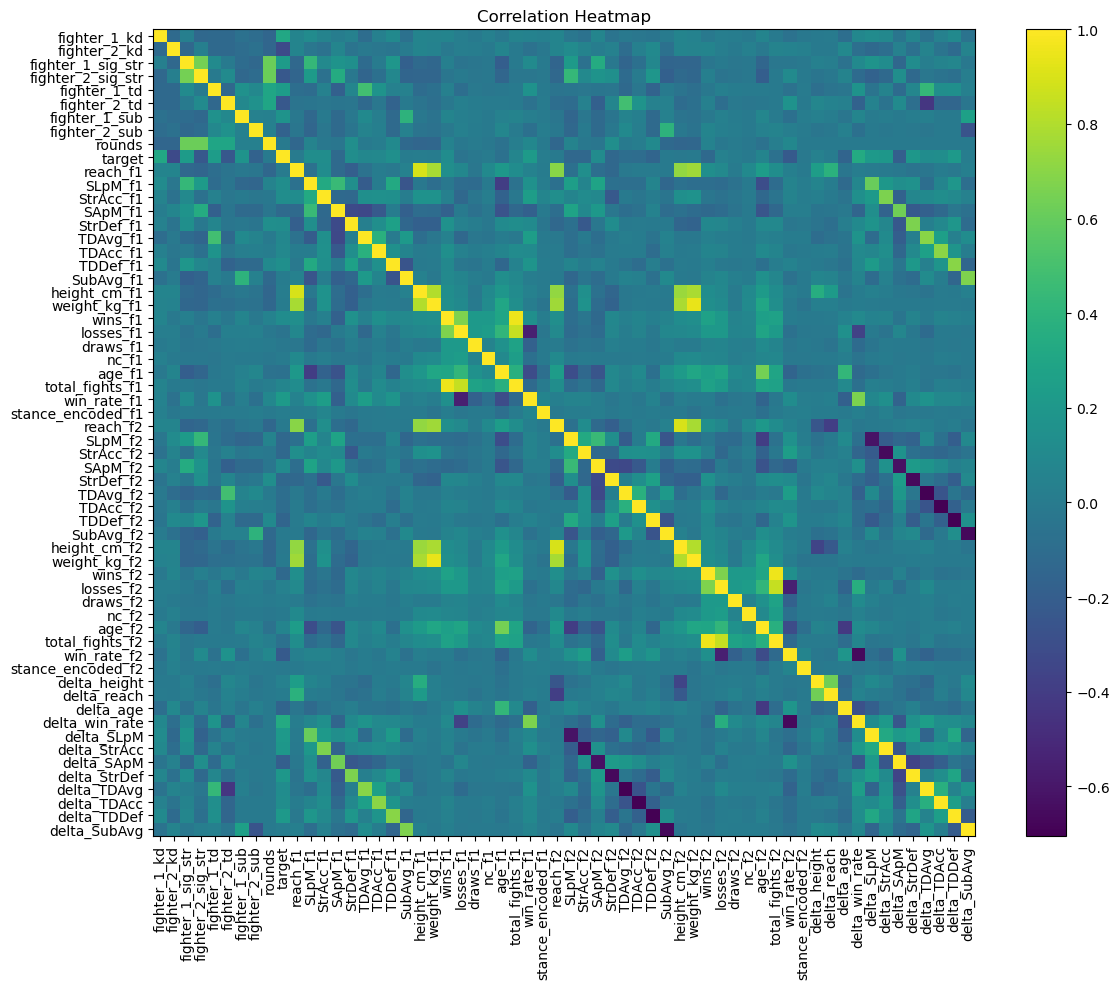

In [815]:
numeric_df = df_final1.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap (no manual colors used)
plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

In [816]:
df_final1.shape[0]

16026

In [818]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16026 entries, 0 to 16079
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fighter_1          16026 non-null  object        
 1   fighter_2          16026 non-null  object        
 2   date               16026 non-null  datetime64[ns]
 3   location           16026 non-null  object        
 4   referee            16026 non-null  object        
 5   fighter_1_kd       16026 non-null  int64         
 6   fighter_2_kd       16026 non-null  int64         
 7   fighter_1_sig_str  16026 non-null  int64         
 8   fighter_2_sig_str  16026 non-null  int64         
 9   fighter_1_td       16026 non-null  int64         
 10  fighter_2_td       16026 non-null  int64         
 11  fighter_1_sub      16026 non-null  int64         
 12  fighter_2_sub      16026 non-null  int64         
 13  weight_class       16026 non-null  object        
 14  method     

# Feature Selection

In [819]:
df_ml_final = df_final1[['target','delta_height','delta_reach','delta_age','delta_win_rate','delta_SLpM','delta_StrAcc',
                         'delta_SApM','delta_StrDef','delta_TDAvg','delta_TDAcc','delta_TDDef','delta_SubAvg']]

In [822]:
df_ml_final.head()

,target,delta_height,delta_reach,delta_age,delta_win_rate,delta_SLpM,delta_StrAcc,delta_SApM,delta_StrDef,delta_TDAvg,delta_TDAcc,delta_TDDef,delta_SubAvg
0,1,-12.70,-7.62,-6.0,0.235967,-1.04,0.02,-2.93,0.04,2.55,0.03,-0.02,-0.4
1,1,10.16,5.08,-9.0,0.116858,0.35,0.11,-0.96,-0.03,-1.22,-0.05,-0.10,0.3
2,1,5.08,-2.54,-2.0,0.015805,1.22,-0.05,0.38,0.05,0.00,-0.02,0.02,-0.1
3,1,-7.62,-7.62,-10.0,0.127451,-1.91,0.03,-0.41,-0.06,4.00,0.16,-0.40,0.2
4,1,0.00,0.00,-1.0,0.013889,2.93,0.01,-0.44,0.10,-0.58,0.20,-0.11,-0.2


In [823]:
x = df_ml_final.drop(columns='target')
y = df_ml_final[['target']]

In [824]:
from sklearn.model_selection import train_test_split

In [825]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle=True )

In [826]:
from sklearn.preprocessing import StandardScaler

In [827]:
scaler = StandardScaler()

In [830]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# ML Model Building

In [833]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1) Random Forest Classifier

In [834]:
rf_model = RandomForestClassifier(n_estimators=200, 
                                      random_state=42, 
                                      class_weight='balanced',
                                      max_depth=15,
                                      min_samples_leaf=5,
                                      n_jobs=-1) # Use all processors
                                

In [835]:
rf_model.fit(x_train_scaled,y_train)

C:\Anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [836]:
y_pred = rf_model.predict(x_test_scaled)

In [837]:
accuracy = accuracy_score(y_test, y_pred)

In [838]:
accuracy

0.6799750467872738

In [839]:
report = classification_report(y_test, y_pred, digits=4)
    
print("\n" + "="*50)
print("MODEL EVALUATION RESULTS (Random Forest)")
print("="*50)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("\nClassification Report (Test Set):\n")
print(report)


MODEL EVALUATION RESULTS (Random Forest)
Test Set Accuracy: 0.6800

Classification Report (Test Set):

              precision    recall  f1-score   support

           0     0.6763    0.6797    0.6780      1589
           1     0.6837    0.6803    0.6820      1617

    accuracy                         0.6800      3206
   macro avg     0.6800    0.6800    0.6800      3206
weighted avg     0.6800    0.6800    0.6800      3206



In [841]:
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False).head(10)
    
print("-" * 50)
print("Top 10 Feature Importances:")
print("-" * 50)
print(feature_importances.to_markdown(numalign='left', stralign='left'))

--------------------------------------------------
Top 10 Feature Importances:
--------------------------------------------------
|                | 0         |
|:---------------|:----------|
| delta_win_rate | 0.214109  |
| delta_SLpM     | 0.127281  |
| delta_SApM     | 0.0993357 |
| delta_TDDef    | 0.091986  |
| delta_TDAvg    | 0.07537   |
| delta_StrAcc   | 0.075123  |
| delta_StrDef   | 0.0714091 |
| delta_TDAcc    | 0.066353  |
| delta_age      | 0.0554462 |
| delta_SubAvg   | 0.0525558 |


# 2) xgBoost 

In [940]:
from xgboost import XGBClassifier

In [941]:
xgb_model = XGBClassifier(
        objective='binary:logistic',
        n_estimators=300,
        learning_rate=0.05, # Using a smaller learning rate and more estimators for better generalization
        max_depth=5, 
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )

In [942]:
xgb_model.fit(x_train_scaled,y_train)

C:\Anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:23:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [943]:
xgb_test_preds = xgb_model.predict(x_test_scaled)

In [944]:
accuracy_xgb = accuracy_score(xgb_test_preds,y_test)

In [945]:
accuracy_xgb

0.682158452900811

In [947]:
report = classification_report(y_test, xgb_test_preds, digits=4)
    
print("\n" + "="*50)
print("MODEL EVALUATION RESULTS (xgBoost)")
print("="*50)
print(f"Test Set Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report (Test Set):\n")
print(report)


MODEL EVALUATION RESULTS (xgBoost)
Test Set Accuracy: 0.6822

Classification Report (Test Set):

              precision    recall  f1-score   support

           0     0.6755    0.6904    0.6829      1589
           1     0.6890    0.6741    0.6815      1617

    accuracy                         0.6822      3206
   macro avg     0.6822    0.6822    0.6822      3206
weighted avg     0.6823    0.6822    0.6822      3206



# Model Testing

In [916]:
def predict_Winner(f1, f2):
 
    f1_stats = df_fighters1[df_fighters1['name'] == f1]
    f2_stats = df_fighters1[df_fighters1['name'] == f2]

   
    if f1_stats.empty:
        return f"Fighter not found: {f1}"
    if f2_stats.empty:
        return f"Fighter not found: {f2}"

  
    f1_stats = f1_stats.iloc[0]
    f2_stats = f2_stats.iloc[0]

    df_pred = pd.DataFrame([{
        'delta_height':   f1_stats.height_cm - f2_stats.height_cm,
        'delta_reach':    f1_stats.reach - f2_stats.reach,
        'delta_age':      f1_stats.age - f2_stats.age,
        'delta_win_rate': f1_stats.win_rate - f2_stats.win_rate,
        'delta_SLpM':     f1_stats.SLpM - f2_stats.SLpM,
        'delta_StrAcc':   f1_stats.StrAcc - f2_stats.StrAcc,
        'delta_SApM':     f1_stats.SApM - f2_stats.SApM,
        'delta_StrDef':   f1_stats.StrDef - f2_stats.StrDef,
        'delta_TDAvg':    f1_stats.TDAvg - f2_stats.TDAvg,
        'delta_TDAcc':    f1_stats.TDAcc - f2_stats.TDAcc,
        'delta_TDDef':    f1_stats.TDDef - f2_stats.TDDef,
        'delta_SubAvg':   f1_stats.SubAvg - f2_stats.SubAvg
    }])


    df_pred_scaled = scaler.transform(df_pred)

   
    prob_f1_wins = rf_model.predict_proba(df_pred_scaled)[0][1]
    prob_f2_wins = 1 - prob_f1_wins

   
    predicted_winner = f1 if prob_f1_wins >= 0.5 else f2
    confidence = max(prob_f1_wins, prob_f2_wins)


    return {
        "fighter_1": f1,
        "fighter_2": f2,
        "predicted_winner": predicted_winner,
        "winner_probability": round(float(confidence), 4),
        f"{f1}_win_prob": round(float(prob_f1_wins), 4),
        f"{f2}_win_prob": round(float(prob_f2_wins), 4),
        "delta_features_used": df_pred.to_dict(orient="records")[0]
    }


In [925]:
predict_Winner( 'Merab Dvalishvili','Umar Nurmagomedov' )

{'fighter_1': 'Merab Dvalishvili',
 'fighter_2': 'Umar Nurmagomedov',
 'predicted_winner': 'Merab Dvalishvili',
 'winner_probability': 0.5018,
 'Merab Dvalishvili_win_prob': 0.5018,
 'Umar Nurmagomedov_win_prob': 0.4982,
 'delta_features_used': {'delta_height': -5.079999999999984,
  'delta_reach': -2.539999999999992,
  'delta_age': 5,
  'delta_win_rate': -0.10999999999999999,
  'delta_SLpM': 0.25,
  'delta_StrAcc': -0.14999999999999997,
  'delta_SApM': 0.5099999999999998,
  'delta_StrDef': -0.039999999999999925,
  'delta_TDAvg': 2.1000000000000005,
  'delta_TDAcc': -0.09999999999999998,
  'delta_TDDef': 0.029999999999999916,
  'delta_SubAvg': 0.0}}

# Neural Network

In [927]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [929]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(12,)), # Input layer
    Dense(32, activation='relu'), # Hidden Layer 1
    Dense(16, activation='relu'), # Hidden Layer 2
    Dense(1, activation='sigmoid') # Output layer (Sigmoid for binary classification)
])

# Compile the model
nn_model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [930]:
print(nn_model.summary())
print("\nTraining Neural Network...")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

None

Training Neural Network...


In [932]:
history = nn_model.fit(
    x_train_scaled, y_train, 
    epochs=20, 

)

Epoch 1/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7466 - loss: 0.5029
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7532 - loss: 0.5006
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7539 - loss: 0.4973
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7510 - loss: 0.4950
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7548 - loss: 0.4952
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7562 - loss: 0.4903
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7583 - loss: 0.4886
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7580 - loss: 0.4869
Epoch 9/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7605 - loss: 0.4856  
Epoch 10/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7626 - loss: 0.4813
Epoch 11/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7613 - loss: 0.4803
Epoch 12/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [935]:
nn_prediction = nn_model.predict(x_test_scaled)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [937]:
y_pred_nn = (nn_prediction > 0.5).astype(int)
y_pred_nn

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [938]:
nn_model.evaluate(x_test_scaled,y_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6491 - loss: 0.6909


[0.6909138560295105, 0.6490954756736755]